# Facet Grid (Multi Plots)
* A facet means one side or aspect of something.
* Multi-plot grid for plotting conditional relationships.
* A general method to create grid of plots based on a feature.
* Maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset.
* Represents levels of a third variable with the hue parameter (plots different subsets of data in different colors).
* Multiple plotting functions can be applied to each subset by calling FacetGrid.map() or FacetGrid.map_dataframe().
* Seaborn API documentation: https://seaborn.pydata.org/api.html
* Seaborn colour palette keywords and list: https://seaborn.pydata.org/tutorial/color_palettes.html
___

In [1]:
# Library Import + Data Load (The built-in Seaborn dataset for learning)
import seaborn as sns
%matplotlib inline

t = sns.load_dataset('tips')
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


___

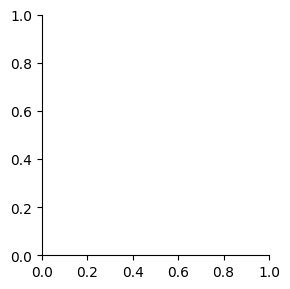

In [2]:
# Initialise but no plot
sns.FacetGrid(t)

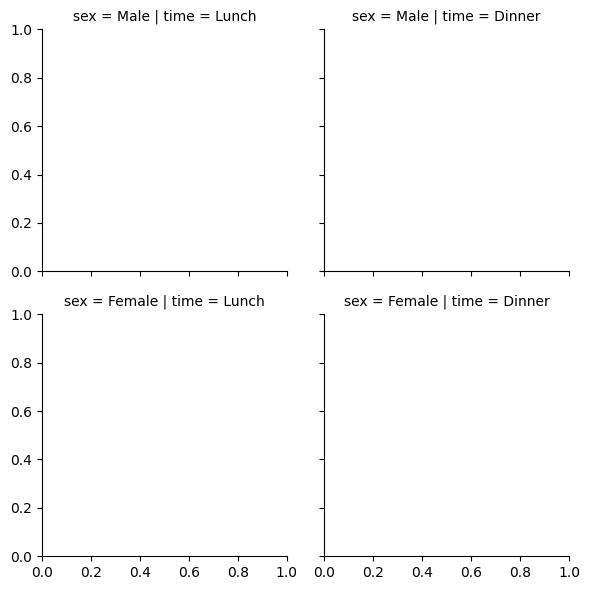

In [3]:
# Assign column and/or row variables to add more subplots
sns.FacetGrid(t, col="time", row="sex")

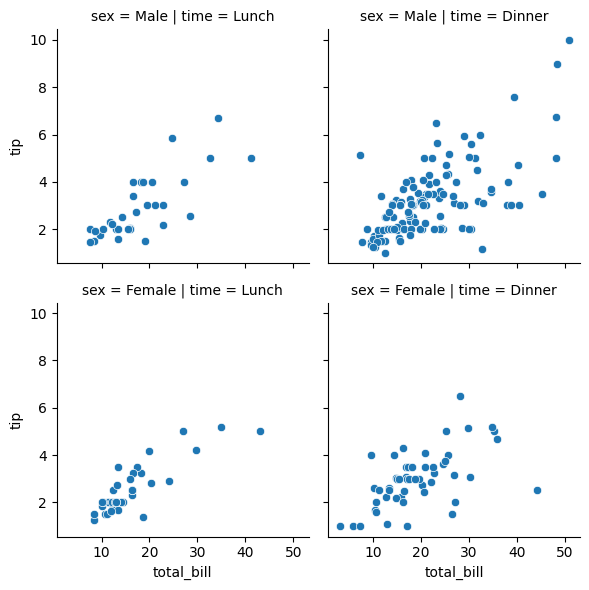

In [5]:
# Pass a function and the name of one or more columns in the dataframe to FacetGrid.map():
p1 = sns.FacetGrid(t, col="time",  row="sex")
p1.map(sns.scatterplot, "total_bill", "tip")

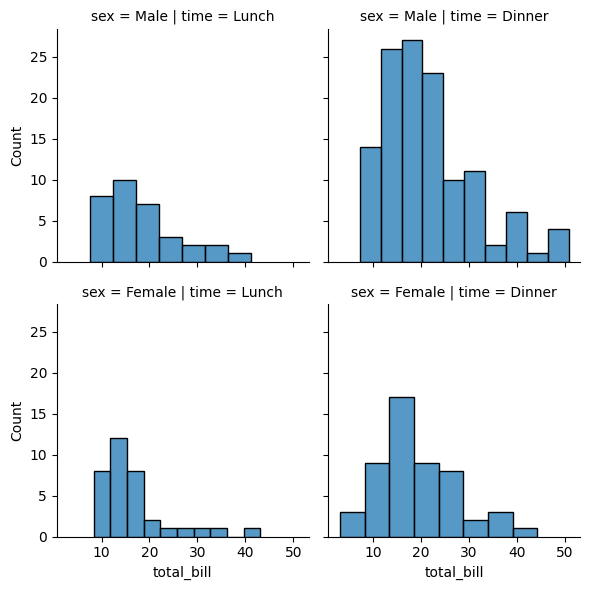

In [4]:
# Below the function has a data parameter and accepts named variable assignments --> use FacetGrid.map_dataframe()
p2 = sns.FacetGrid(t, col="time",  row="sex")
p2.map_dataframe(sns.histplot, x="total_bill")

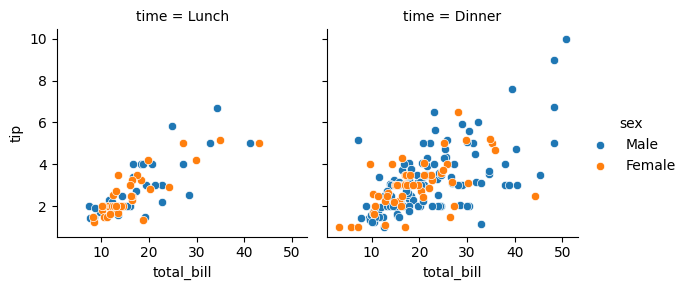

In [7]:
# FacetGrid + scatterplot + legend()
p3 = sns.FacetGrid(t, col="time", hue="sex")
p3.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
p3.add_legend()

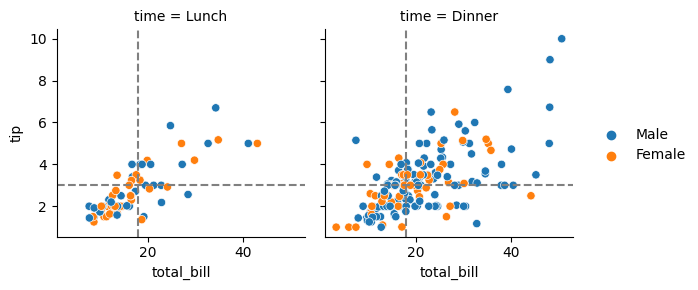

In [9]:
# Notice here, the hue is set on the dataframe instead on the FacetGrid
# The FacetGrid.refline() method adds horizontal or vertical reference lines on every facet
p4 = sns.FacetGrid(t, col="time")
p4.map_dataframe(sns.scatterplot, x="total_bill", y="tip", hue="sex")
p4.add_legend()
p4.refline( x=t["total_bill"].median(), y=t["tip"].mean())

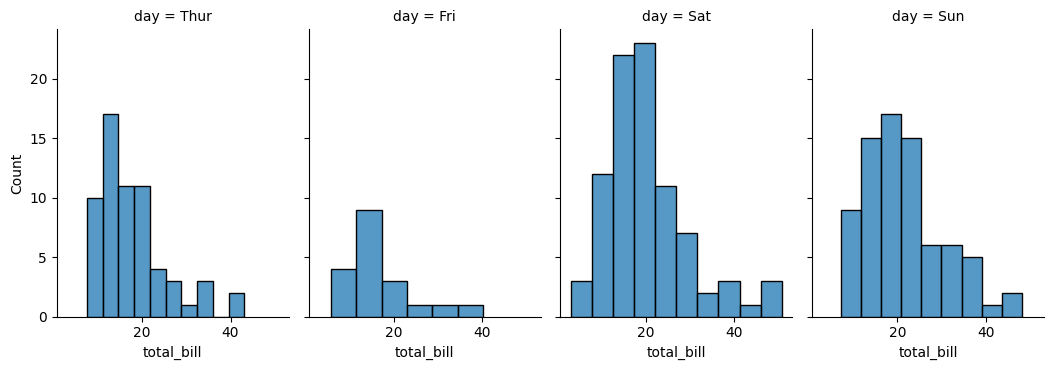

In [15]:
p5 = sns.FacetGrid(t, col="day", height=3.8, aspect=0.7)
p5.map(sns.histplot, "total_bill")

___
## Utility Function: move_legend()
* Recreate a plot’s legend at a new location.
* The function copies the data and removes the original object location, then creates a new legend at the new location.
* Use the bbox_to_anchor parameter to move the legend outside of the axes (applicable to single plots). For example: **bbox_to_anchor=(1, 1)**

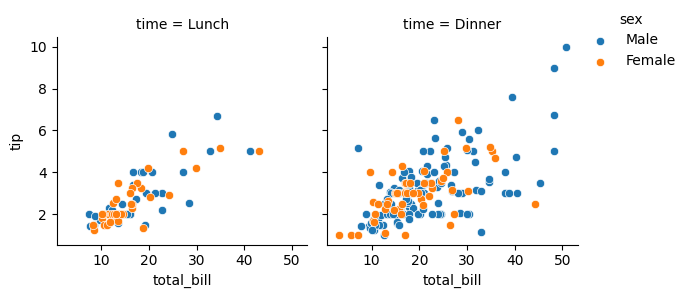

In [6]:
# Try location key words such as lower right, center right, upper left, etc.
p3 = sns.FacetGrid(t, col="time", hue="sex")
p3.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
p3.add_legend()
sns.move_legend(p3, "upper right")

___